## Байесовские оценки

In [2]:
%matplotlib inline
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

### Задача 1

Оценка методом максимального правдоподобия для $N(0, \theta)$  - $\theta^* = \overline{X^2}$ (с учетом извесного мат ожидания). Байесовская оценка с сопряженном априорным расперделением $\Gamma_{inv}(\alpha, \beta)$: $\; \theta^* = \cfrac{\frac{\overline{X^2}}{2} + \beta}{\frac{n}{2} + \alpha - 1}$ 

Text(0.5,0,'$n$')

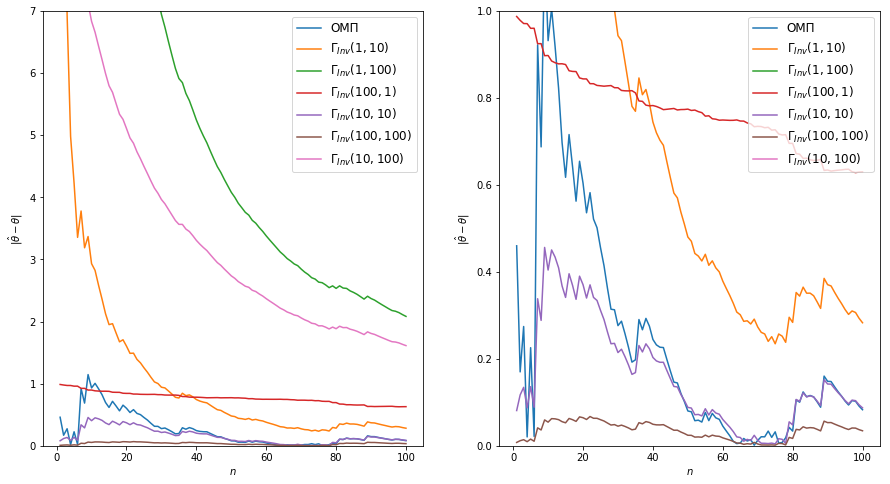

In [79]:
N = 100
n = np.arange(1, N + 1)
X = sps.norm.rvs(size=N, loc=0, scale=1)
estimate_lh = (X**2).cumsum() / n #оценка методом максимального правдоподобия
parametrs = np.array([[1, 10], [1, 100], [100, 1], [10, 10], [100, 100], [10, 100]]) #параметры априор распр
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.ylim(0, 7)
plt.plot(n, np.abs(estimate_lh - np.ones(N)), label="ОМП")
for i in range(parametrs.shape[0]):  #считаем байейсовские оценки
    estimate_bayes = ((X**2).cumsum() / 2 + parametrs[i][1]) / (n / 2 + parametrs[i][0] - 1)
    plt.plot(n, np.abs(estimate_bayes - np.ones(N)), label=r"$\Gamma_{Inv}(" + str(parametrs[i][0]) + ',' + \
             str(parametrs[i][1]) + ')$')
plt.legend(fontsize=12, loc=1)
plt.ylabel(r"$|\hat{\theta} - \theta|$")
plt.xlabel(r"$n$")

#то же самое только в большем масштабе для наглядности
plt.subplot(1, 2, 2)
plt.ylim(0, 1)
plt.plot(n, np.abs(estimate_lh - np.ones(N)), label="ОМП")
for i in range(parametrs.shape[0]):
    estimate_bayes = ((X**2).cumsum() / 2 + parametrs[i][1]) / (n / 2 + parametrs[i][0] - 1)
    plt.plot(n, np.abs(estimate_bayes - np.ones(N)), label=r"$\Gamma_{Inv}(" + str(parametrs[i][0]) + ',' + \
             str(parametrs[i][1]) + ')$')
plt.legend(fontsize=12, loc=1)
plt.ylabel(r"$|\hat{\theta} - \theta|$")
plt.xlabel(r"$n$")

Из графика видно, что лучше всего ведет себя (из приведенных) байесовская оценка с априорным распределением с параметрами: $(100, 100)$ и $(10, 10)$. В целом при правильном подборе парметров в априорном распределении, байесовская оценка может получиться лучше ОМП. Однако, априорное распределение с параметрами $(1, 100)$, $(10, 100)$ дает результаты хуже в байесовской оценке. То есть для нашего случая оба параметра априорного распределения должны быть примерно одинаковыми (видно из оценки формулы).

In [85]:
for i in range(parametrs.shape[0]):
    print("При параметрах ({}, {}) вероятность получить точку в отрезке [-0.5, 1.5] будет {}%".format(\
        parametrs[i][0], parametrs[i][1], \
        (np.abs(sps.invgamma.cdf(1 - 0.5, a=parametrs[i][0], scale=parametrs[i][1]) - \
            sps.invgamma.cdf(1 + 0.5, a=parametrs[i][0], scale= parametrs[i][1]))*100).round(2)))

При параметрах (1, 10) вероятность получить точку в отрезке [-0.5, 1.5] будет 0.13%
При параметрах (1, 100) вероятность получить точку в отрезке [-0.5, 1.5] будет 0.0%
При параметрах (100, 1) вероятность получить точку в отрезке [-0.5, 1.5] будет 0.0%
При параметрах (10, 10) вероятность получить точку в отрезке [-0.5, 1.5] будет 85.76%
При параметрах (100, 100) вероятность получить точку в отрезке [-0.5, 1.5] будет 99.99%
При параметрах (10, 100) вероятность получить точку в отрезке [-0.5, 1.5] будет 0.0%


Небольшой код выше наглядно демонстрирует, какие параметры будут лучше для байесовской оценки, что согласуется с приведенными выводами выше. 

### Задача 2

Пусть $X_i$ распределено по закону $Bern(\theta)$. Тогда ОМП будет $\theta^* = \overline{X}$. Байесвоская оценка с сопряженным априорным распределением $B(\alpha, \beta)$ будет: $\cfrac{n\overline{X} + \alpha}{n + \alpha + \beta}$

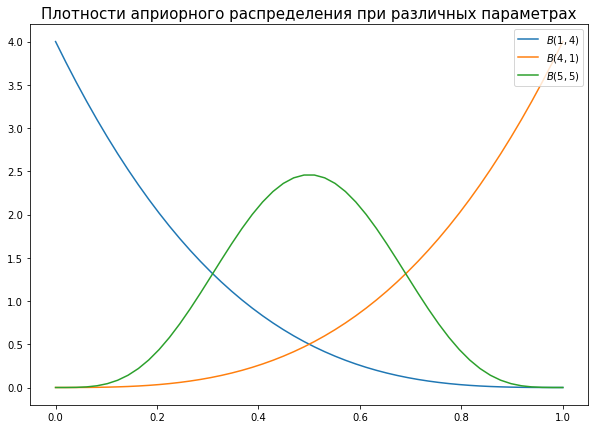

In [144]:
#построим графики для разных априорных распределений
grid = np.linspace(0, 1)
parametrs = np.array([[1, 4], [4, 1], [5, 5]])
plt.figure(figsize=(10, 7))
plt.title("Плотности априорного распределения при различных параметрах", fontsize=15)
for i in range(parametrs.shape[0]):
    plt.plot(grid, sps.beta.pdf(grid, a=parametrs[i][0], b=parametrs[i][1]), \
        label=r"$B(" + str(parametrs[i][0]) + ',' + str(parametrs[i][1])  + ")$")
plt.legend(loc=1)

Из графика видно, что параметры $(5,5)$ характеризуют случай, когда монета, скорее честная (чем нечестная), то есть скорей всего параметр $p$ лежит около $0.5$, где мы и видим пик плотности на графике. При параметрах $(1, 4)$ - монета скорее нечестная, причем в сторону решки ($p$ вероятнее всего будет около 0), при параметрах $(4, 1)$ - наоборот. Исходя из этого рассмотрим 3 монеты: честную, нечестную с перевесом в сторону "решки" и нечестную с перевесом в сторону "орла". И сравним полученные байесовские оценки для всех 3 пар парметров для каждой монеты. 

[[0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]
 [1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1]]


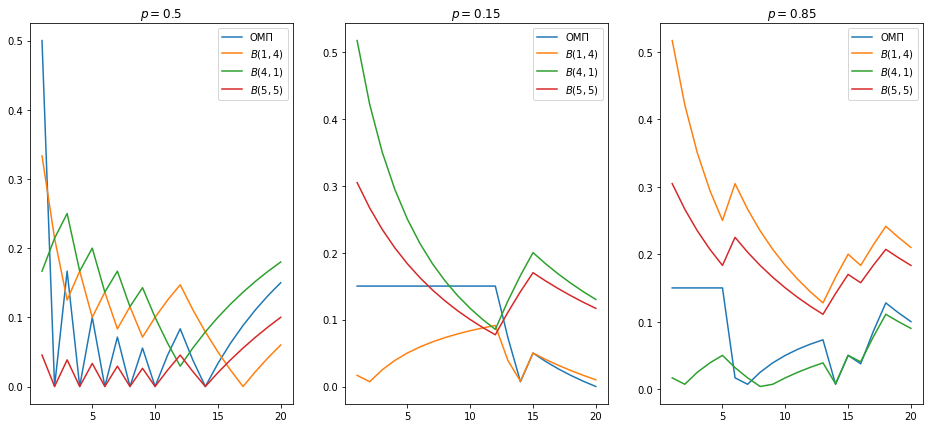

In [142]:
N = 20
n = np.arange(1, N + 1)
p = np.array([0.5, 0.15, 0.85])
X = sps.binom.rvs(n=1, p=p, size=(N, p.size))
X = np.transpose(X)
print(X)
likelihood_estimate = np.array([x.cumsum() / n for x in X])
plt.figure(figsize=(16, 7))
for i in range(likelihood_estimate.shape[0]):
    plt.subplot(1, likelihood_estimate.shape[0], i + 1)
    plt.title(r"$p = $" + str(p[i]))
    plt.plot(n, np.abs(likelihood_estimate[i] - p[i]), label="ОМП")
    for j in range(parametrs.shape[0]):
        probe = X[i]
        bayes_estimate = (probe.cumsum() + parametrs[j][0]) / (n + parametrs[j][0] + parametrs[j][1])
        plt.plot(n, np.abs(bayes_estimate - p[i]), \
                 label=r"$B(" + str(parametrs[j][0]) + ',' + str(parametrs[j][1])  + ")$")
    plt.legend(loc=1)

Из графиков видно, что в случае "честной" монеты, лучше всего подходит байесовская оценка с параметрами $(5, 5)$. Как раз априорное распределения с этими параметрами, больше всего давало вероятность онаружить параметр около 0.5. 
Аналогично можно сказать и про нечетные монеты. У них лучшие оценки получились те, априорное распределение которых учитывает "перекос" параметра p правильно. При этом во всех трех случаях байесовская оценка с "правильным" априорным распределением оказывается лучше ОМП. 

### Задача 3

Найдем сначала парметры априорного распеделения $N(a, \sigma^2)$. Согласно правилу "3-х сигма" случайная величина $\theta$ попадает в интервал $(-2\sigma, 2\sigma)$ с вероятностью чуть больше 95% (точнее 95.45%). Отсюда находим, что $2\sigma = 0.5$, отсюда $\sigma = 0.25 \rightarrow \sigma^2 = 0.0625$. Внизу небольшой кусочек кода с проверкой. В этой модели байеосвкая оценка будет находится по формуле: $\hat{\theta} = \cfrac{n\sigma^2\overline{X}}{n\sigma^2 + 1}$

In [3]:
sigma = 0.25
print("Вероятность попаданя в интервал {}%".format(\
        ((sps.norm.cdf(0.5, loc=0, scale=sigma) - sps.norm.cdf(-0.5, loc=0, scale=sigma))*100).round(2)))

Вероятность попаданя в интервал 95.45%


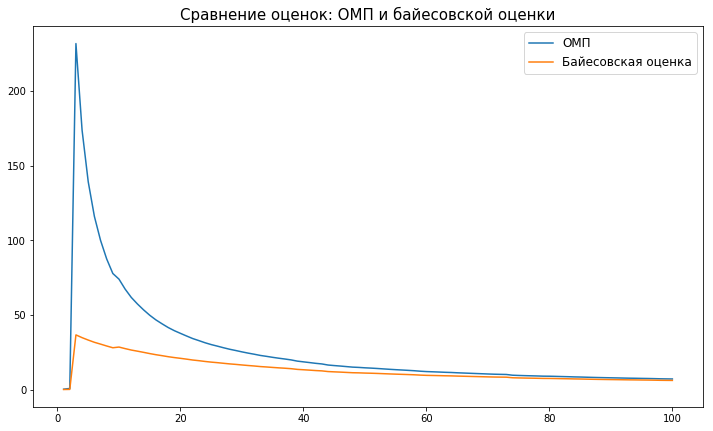

In [4]:
N = 100
n = np.arange(1, N + 1)
X = sps.cauchy.rvs(size=N, loc=0, scale=1)
MaxLikeHood = X.cumsum() / n
BayesEstimate = (X.cumsum() * sigma**2) / (n * sigma**2 + 1)
plt.figure(figsize=(12, 7))
plt.title("Сравнение оценок: ОМП и байесовской оценки", fontsize=15)
plt.plot(n, np.abs(MaxLikeHood), label="ОМП")
plt.plot(n, np.abs(BayesEstimate), label="Байесовская оценка")
plt.legend(fontsize=12)

Итак, с графика выше видно, что байесовская оценка немного лучше ведет себя по сравнению с ОМП (но при правильно подобраных параметрах априорного распределения).

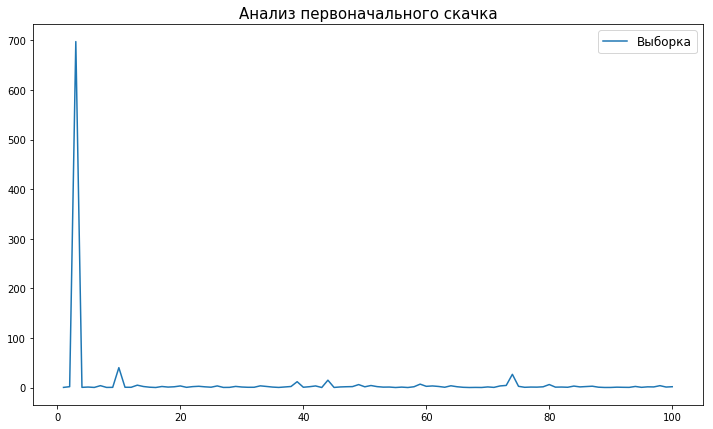

In [6]:
plt.figure(figsize=(12, 7))
plt.title("Анализ первоначального скачка", fontsize=15)
plt.plot(n, np.abs(X), label="Выборка")
plt.legend(fontsize=12)

График выше, обясняет полученные плохие оценки при небольших n. То есть там есть явный скачок (это особенность распределения Коши). 

### Задача 4

Сопряженное к распределению $Exp(\lambda)$ является $\Gamma(\alpha, \beta)$. Посмотрим плотность априорного распределния при различных параметрах и подберем нужные нам:

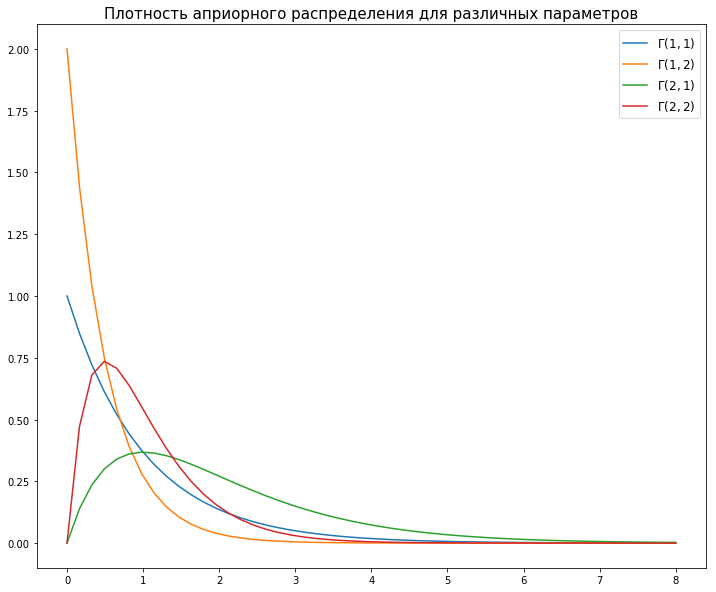

In [44]:
grid = np.linspace(0, 8)
parametrs = np.array([[1, 1], [1, 2], [2, 1], [2, 2]])
plt.figure(figsize=(12, 10))
plt.title("Плотность априорного распределения для различных параметров", fontsize=15)
for i in range(parametrs.shape[0]):
    plt.plot(grid, sps.gamma.pdf(grid, a=parametrs[i][0], scale=1 / parametrs[i][1]), \
        label=r"$\Gamma(" + str(parametrs[i][0]) + "," + str(parametrs[i][1]) + ")$")
plt.legend(loc=1, fontsize=12)

Так как наш параметр $\lambda$-скорей всего ближе к единице, то больше всего подходит априорное распределение $\Gamma(1, 2)$ (из приведенных выше), к тому же у него нет определенных акцентов на какое-либо значение. Байесовская оценка будет считаться по формуле: $\hat{\lambda} = \cfrac{n + \alpha}{\beta + n\overline{X}}$. Исходя из этого решим задачу УМО не зная заранее параметра $\lambda$. 

In [58]:
import time
import re
import pandas as pd

def getlambda(sample, alpha, beta):
    n = sample.size
    return (n + alpha) / (beta + sample.sum())

#извлечение данных
data = pd.read_csv("6.csv.xls", header=None)
data = data.values
parametrs = re.findall(r'\b[0-9]+', data[0][0] + data[1][0] + data[2][0])
data = data[3:]

#задаем параметры
alpha = 1
beta = 2
#массив куда будем записывать время отключения очередного сервера
X = np.array([])
lambda_ = getlambda(X, alpha, beta)
t0 = int(parametrs[1])
t = int(parametrs[2])
n = 0   #количество сломанных компьютеров к моменту времени s
print("Параметры: lambda = {}, t0 = {}, t = {}".format(lambda_, t0, t))  #Печатаем параметры
for s in range(0, t + 1, t0):
    while(n < data.size and float(data[n]) <= s):  #бежим по массиву данных сравнивая и смотрим какие серверы
        if(n == 0):
            X = np.append(X, float(data[n]))
        else:
            X = np.append(X, float(data[n]) - float(data[n - 1]))
        n += 1  #вышли из строя к моенту времени s
    lambda_ = getlambda(X, alpha, beta)
    prediction = n + lambda_ * (t - s)
    print("s = {}, N_s = {}, lambda = {}, prediction = {}".format(s, n, lambda_, int(prediction))) #вывод данных
    #time.sleep(t0)


Параметры: lambda = 0.5, t0 = 50, t = 15000
s = 0, N_s = 0, lambda = 0.5, prediction = 7500
s = 50, N_s = 5, lambda = 0.17226083735993042, prediction = 2580
s = 100, N_s = 7, lambda = 0.08826602497266513, prediction = 1322
s = 150, N_s = 9, lambda = 0.07187630949651364, prediction = 1076
s = 200, N_s = 13, lambda = 0.0714439537492256, prediction = 1070
s = 250, N_s = 15, lambda = 0.06765130319665093, prediction = 1012
s = 300, N_s = 18, lambda = 0.06443076100867373, prediction = 965
s = 350, N_s = 22, lambda = 0.06837818248412586, prediction = 1023
s = 400, N_s = 24, lambda = 0.06609086542287182, prediction = 988
s = 450, N_s = 26, lambda = 0.062401327900257715, prediction = 933
s = 500, N_s = 30, lambda = 0.06223997243773091, prediction = 932
s = 550, N_s = 35, lambda = 0.06571174120963999, prediction = 984
s = 600, N_s = 36, lambda = 0.06256791578155613, prediction = 936
s = 650, N_s = 39, lambda = 0.0643299457183918, prediction = 962
s = 700, N_s = 46, lambda = 0.06859060892407604, 

Из вывода видим, что при отсутсвии данных предсказание может получится совсем неточным, однако по мере поступления данных параметр $\lambda$ - все точнее и точнее оценивается, поэтому prediction становится точным достаточно быстро (уже на 250с prediction почти совпадает с истинным значением). Тут еще проблема в том, что мы практически ничего не знаем о параметре $\lambda$, поэтому априорное распределение не может нам дать какой-либо точной информации об этом параметре в отсутсвии данных. Если бы мы правильно подобрали параметры для априорного распределения, то предсказания получились бы еще более точными уже с первых секунд.